In [29]:
import pandas as pd
df = pd.read_json('dataset.json')
df.drop(columns=['Turn'],inplace=True)
df.head()

,State,Action
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0]",5
1,"[0, 0, 0, 0, 0, 1, 0, 0, 0]",7
2,"[0, 0, 0, 0, 0, 1, 0, -1, 0]",8
3,"[0, 0, 0, 0, 0, 1, 0, -1, 1]",2
4,"[0, 0, -1, 0, 0, 1, 0, -1, 1]",4


In [30]:
df.shape

(1703, 2)

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['State'], df['Action'], test_size = 0.3)

x_train = np.asarray(list(map(lambda x: np.asarray(x).astype(np.float32), x_train)))
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))

x_test = np.asarray(list(map(lambda x: np.asarray(x).astype(np.float32), x_test)))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

y_train = np.asarray(y_train).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [25]:
OUT_DIM = len(df['Action'].unique())+1
INPUT_SHAPE = x_train[0].shape

In [26]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = INPUT_SHAPE),
    tf.keras.layers.Bidirectional(LSTM(27)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(OUT_DIM, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 54)                7992      
_________________________________________________________________
dropout_2 (Dropout)          (None, 54)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                550       
Total params: 8,542
Trainable params: 8,542
Non-trainable params: 0
_________________________________________________________________


In [28]:
import numpy as np

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
history = model.fit(x_train, y_train, 
                    epochs=300, 
                    validation_data=(x_test, y_test), 
                    verbose=1,
                    callbacks=[es_callback])

Epoch 1/300
38/38 [==============================] - 1s 31ms/step - loss: 2.3052 - accuracy: 0.1057 - val_loss: 2.2882 - val_accuracy: 0.1434
Epoch 2/300
38/38 [==============================] - 0s 7ms/step - loss: 2.2834 - accuracy: 0.1357 - val_loss: 2.2714 - val_accuracy: 0.1473
Epoch 3/300
38/38 [==============================] - 0s 6ms/step - loss: 2.2613 - accuracy: 0.1415 - val_loss: 2.2553 - val_accuracy: 0.1415
Epoch 4/300
38/38 [==============================] - 0s 5ms/step - loss: 2.2442 - accuracy: 0.1707 - val_loss: 2.2394 - val_accuracy: 0.1686
Epoch 5/300
38/38 [==============================] - 0s 7ms/step - loss: 2.2233 - accuracy: 0.1757 - val_loss: 2.2228 - val_accuracy: 0.1686
Epoch 6/300
38/38 [==============================] - 0s 7ms/step - loss: 2.2054 - accuracy: 0.1765 - val_loss: 2.2064 - val_accuracy: 0.1880
Epoch 7/300
38/38 [==============================] - 0s 5ms/step - loss: 2.1878 - accuracy: 0.1957 - val_loss: 2.1913 - val_accuracy: 0.1938
Epoch 8/300


38/38 [==============================] - 0s 9ms/step - loss: 1.3083 - accuracy: 0.5629 - val_loss: 1.3600 - val_accuracy: 0.5659
Epoch 59/300
38/38 [==============================] - 0s 5ms/step - loss: 1.3011 - accuracy: 0.5720 - val_loss: 1.3498 - val_accuracy: 0.5698
Epoch 60/300
38/38 [==============================] - 0s 10ms/step - loss: 1.2973 - accuracy: 0.5670 - val_loss: 1.3414 - val_accuracy: 0.5698
Epoch 61/300
38/38 [==============================] - 0s 10ms/step - loss: 1.2672 - accuracy: 0.5787 - val_loss: 1.3309 - val_accuracy: 0.5795
Epoch 62/300
38/38 [==============================] - 1s 15ms/step - loss: 1.2754 - accuracy: 0.5862 - val_loss: 1.3232 - val_accuracy: 0.5717
Epoch 63/300
38/38 [==============================] - 0s 9ms/step - loss: 1.2700 - accuracy: 0.5712 - val_loss: 1.3138 - val_accuracy: 0.5833
Epoch 64/300
38/38 [==============================] - 0s 6ms/step - loss: 1.2665 - accuracy: 0.5795 - val_loss: 1.3042 - val_accuracy: 0.5795
Epoch 65/300
38/

38/38 [==============================] - 0s 5ms/step - loss: 1.0359 - accuracy: 0.6353 - val_loss: 1.0666 - val_accuracy: 0.6202
Epoch 116/300
38/38 [==============================] - 0s 7ms/step - loss: 1.0222 - accuracy: 0.6420 - val_loss: 1.0643 - val_accuracy: 0.6221
Epoch 117/300
38/38 [==============================] - 0s 6ms/step - loss: 1.0243 - accuracy: 0.6619 - val_loss: 1.0608 - val_accuracy: 0.6415
Epoch 118/300
38/38 [==============================] - 0s 5ms/step - loss: 1.0242 - accuracy: 0.6478 - val_loss: 1.0593 - val_accuracy: 0.6376
Epoch 119/300
38/38 [==============================] - 0s 5ms/step - loss: 1.0102 - accuracy: 0.6578 - val_loss: 1.0583 - val_accuracy: 0.6318
Epoch 120/300
38/38 [==============================] - 0s 5ms/step - loss: 1.0130 - accuracy: 0.6486 - val_loss: 1.0581 - val_accuracy: 0.6279
Epoch 121/300
38/38 [==============================] - 0s 8ms/step - loss: 1.0212 - accuracy: 0.6453 - val_loss: 1.0548 - val_accuracy: 0.6318
Epoch 122/300

38/38 [==============================] - 0s 9ms/step - loss: 0.9541 - accuracy: 0.6536 - val_loss: 0.9779 - val_accuracy: 0.6628
Epoch 173/300
38/38 [==============================] - 0s 6ms/step - loss: 0.9288 - accuracy: 0.6811 - val_loss: 0.9762 - val_accuracy: 0.6647
Epoch 174/300
38/38 [==============================] - 0s 9ms/step - loss: 0.9555 - accuracy: 0.6628 - val_loss: 0.9747 - val_accuracy: 0.6647
Epoch 175/300
38/38 [==============================] - 0s 8ms/step - loss: 0.9356 - accuracy: 0.6694 - val_loss: 0.9742 - val_accuracy: 0.6686
Epoch 176/300
38/38 [==============================] - 0s 7ms/step - loss: 0.9609 - accuracy: 0.6728 - val_loss: 0.9737 - val_accuracy: 0.6667
Epoch 177/300
38/38 [==============================] - 0s 8ms/step - loss: 0.9459 - accuracy: 0.6628 - val_loss: 0.9728 - val_accuracy: 0.6628
Epoch 178/300
38/38 [==============================] - 0s 9ms/step - loss: 0.9340 - accuracy: 0.6711 - val_loss: 0.9717 - val_accuracy: 0.6628
Epoch 179/300

38/38 [==============================] - 0s 8ms/step - loss: 0.8803 - accuracy: 0.7036 - val_loss: 0.9367 - val_accuracy: 0.6686
Epoch 230/300
38/38 [==============================] - 0s 12ms/step - loss: 0.8820 - accuracy: 0.6911 - val_loss: 0.9352 - val_accuracy: 0.6667
Epoch 231/300
38/38 [==============================] - 0s 7ms/step - loss: 0.8750 - accuracy: 0.6903 - val_loss: 0.9352 - val_accuracy: 0.6705


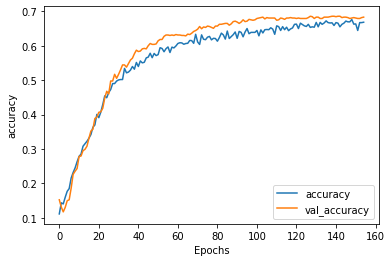

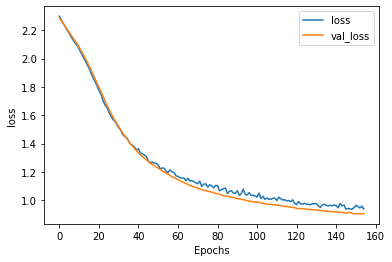

In [7]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [14]:
input_state = [[-1, 1, -1, 0, 0, 0, 1, -1, 1]]

inp = np.asarray(input_state).astype(np.float32)
inp = inp.reshape(((inp.shape[0], 1, inp.shape[1])))
prediction = model.predict(inp)
#print(prediction)

print(np.argmax(prediction))

3


In [9]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('model.tflite', 'wb+') as f:
  f.write(tflite_model)